## Frequency of Bucket Spills (Fig-7)

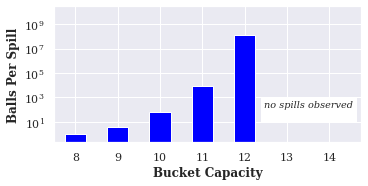

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
#sns.set_style("whitegrid")

from matplotlib.ticker import PercentFormatter
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x


#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='12')

df = pd.read_csv("base/Base8.Spills.stat", delimiter='\s+')

# Add Trials/Spill for Extra-Ways=0
id=len(df)+1
df.at[id, 'ExtraWaysPerSkew'] = 0
df.at[id, 'Trials/Spill'] = 1
#print (df)

fig = plt.figure(figsize=(5.5,2.5))
plt.bar(df['ExtraWaysPerSkew']+8, df['Trials/Spill'], align='center', width = 0.5, color='blue')


ax = plt.gca()

#xticks
print()
plt.xticks(df['ExtraWaysPerSkew']+8)
ax.set_xlim(7.5,14.75)

#axes labels
plt.xlabel('Bucket Capacity',weight = 'bold')
plt.ylabel('Balls Per Spill',weight = 'bold')

#Set Y format & limts
ax.set_yscale('log')
ax.set_ylim(0.2,3*10**10)

#grid
ax.axis('on')
#ax.xaxis.grid()

#Text
ax.text(13.5, 10**2, 'no spills observed\n', style='italic',
        bbox={ 'facecolor': 'white','pad': 3}, family='serif',size='9.7',
        ha='center', va='center')

fig.savefig("Fig7.pdf",bbox_inches='tight')